In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from IPython.display import clear_output

from natsort import natsorted

In [2]:
maxToAdd = 8
size = 64

### calculate # of frames ( = # of videos)

In [3]:
# PATH = 'E:/EmotiW2017/lstm/Train_AFEW'
PATH = 'E:/EmotiW2017/lstm/aligned/Train_AFEW'

n_vids_train = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            for fra in os.listdir(full_vid):
                full_fra = full_vid + '/' + fra
                if os.path.isfile(full_fra):
                    n_vids_train += 1

print("> %d frames found." % (n_vids_train))
print("> %d sequences of images will be generated." % (n_vids_train))

> 40064 frames found.
> 40064 sequences of images will be generated.


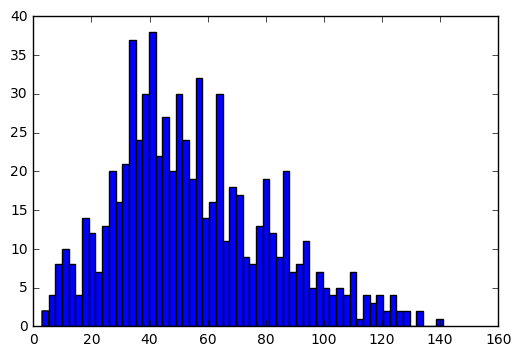

In [4]:
n_vids_train_ = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            n_vids_train_ += 1

n_fra_stat_train = np.zeros((n_vids_train_, 1))
vid_indx = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            for fra in os.listdir(full_vid):
                full_fra = full_vid + '/' + fra
                if os.path.isfile(full_fra):
                    n_fra_stat_train[vid_indx, 0] += 1
                    
            vid_indx += 1

plt.hist(n_fra_stat_train, bins=60)
plt.show()

### resampling

> processed 40064/40064 sequence(s)
X_train shape:  (40064, 8, 64, 64, 1)
y_train shape:  (40064,)


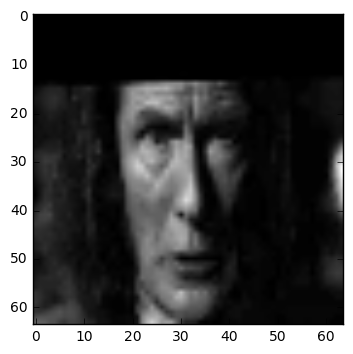

done.


In [ ]:
def emo2int(emo):
    if emo == 'Angry':
        return 0
    elif emo == 'Disgust':
        return 1
    elif emo == 'Fear':
        return 2
    elif emo == 'Happy':
        return 3
    elif emo == 'Neutral':
        return 4
    elif emo == 'Sad':
        return 5
    else:
        return 6

X_train = []
y_train = []

X_train = np.zeros((n_vids_train, maxToAdd, size, size, 1))

vid_indx = 0
seq_indx = 0

for emo in natsorted(os.listdir(PATH)):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in natsorted(os.listdir(full_emo)):
            full_vid = full_emo + '/' + vid
            
            # Initialize a training example of max_num_time_steps, im_size, im_size
            output = np.zeros((maxToAdd, size, size, 1))
            
            # Sample that images
            fra_indx = 0
            
            # Read the first image for current sequence
            for fra in natsorted(os.listdir(full_vid)):
                new_fra_indx = 0
                n_read_images = 0
                
                example = np.zeros((maxToAdd, size, size))
                
                print('-------------------')
                
                # Read subimages #1
                lst_subimgs = natsorted(os.listdir(full_vid))
                while n_read_images < maxToAdd:
                    if fra_indx <= new_fra_indx:
                        # Read subimage
                        full_fra = full_vid + '/' + lst_subimgs[new_fra_indx]
#                         print(lst_subimgs[new_fra_indx] + ' - ' + str(n_read_images) + ' - ' + str(fra_indx) + ' - ' + str(new_fra_indx))
                        img = cv2.imread(full_fra)
                        img = cv2.resize(img, (size, size))
                        img = img[:, :, 0]
                        example[n_read_images] = img

                        n_read_images += 1
                    
                    new_fra_indx += 1
                    
                    # There are not enough images? Reuse them!
                    if n_fra_stat_train[vid_indx, 0] <= new_fra_indx:
                        new_fra_indx -= 1
                        
                        
                # Read subimages #2
#                 for new_fra in natsorted(os.listdir(full_vid)):
#                     if n_read_images < maxToAdd:
#                         if fra_indx <= new_fra_indx: 
#                             # Read subimage
#                             full_fra = full_vid + '/' + new_fra
#                             print(new_fra + ' - ' + str(n_read_images) + ' - ' + str(fra_indx) + ' - ' + str(new_fra_indx))
#                             img = cv2.imread(full_fra)
#                             img = cv2.resize(img, (size, size))
#                             img = img[:, :, 0]
#                             example[n_read_images] = img
                            
#                             n_read_images += 1
#                     else:
#                         break
                    
#                     new_fra_indx += 1
                    
#                     # There are not enough images? Reuse them!
#                     if n_fra_stat_train[vid_indx, 0] <= new_fra_indx:
#                         new_fra_indx -= 1
            
                output[0:maxToAdd, :, :, 0] = example
                X_train[seq_indx, :, :, :, :] = output

                # Get the label for current video
                y_train.append(emo2int(emo))

                seq_indx += 1
                
                clear_output(wait=True)
                print('> processed %d/%d sequence(s)' % (seq_indx, n_vids_train))
                
                fra_indx += 1

            vid_indx += 1

y_train = np.array(y_train)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

plt.imshow(X_train[0, 0, :, :, 0], cmap='gray')
plt.show()

print('done.')

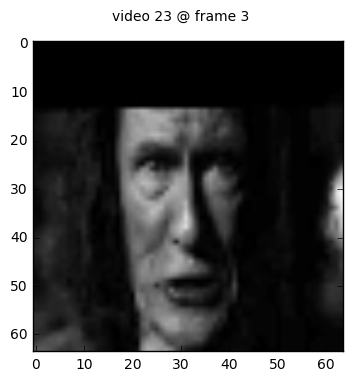

In [ ]:
for i in range(n_vids_train):
    for j in range(maxToAdd):
        clear_output(wait=True)
        plt.imshow(X_train[i, j, :, :, 0], cmap='gray')
        plt.suptitle('video ' + str(i) + ' @ frame ' + str(j))
        plt.show()
        y_train[i]